In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [63]:
df=pd.read_csv('cars.csv')

In [65]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [69]:
df.shape

(892, 6)

In [71]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [203]:
copy=df.copy()

## Data Quality Issues & Cleaning

Name: Inconsistent, contains company names or spam → remove extra text, keep only model name.

Company: Some entries are invalid ('Used', 'URJENT') → replace with 'Unknown'.

Year: Non-year values, object type → replace invalids with NaN, convert to int.

Price: Contains 'Ask for Price', commas, object type → replace invalids with NaN, remove commas, convert to int.

Kms Driven: Has ' km', commas, NaN, wrong entries like 'Petrol' → clean text, convert to int, fix errors.

Fuel Type: Missing values → fill with 'Unknown'.

## Cleaning Data 

#### year has many non-year values

In [76]:
df=df[df['year'].str.isnumeric()]

#### year is in object. Change to integer

In [79]:
df['year']=df['year'].astype(int)

#### Price has Ask for Price

In [82]:
df=df[df['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [85]:
df['Price']=df['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [88]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [91]:
df=df[df['kms_driven'].str.isnumeric()]

In [93]:
df['kms_driven']=df['kms_driven'].astype(int)

#### fuel_type has nan values

In [40]:
df=df[~df['fuel_type'].isna()]

In [42]:
car.shape

(816, 6)

In [95]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [98]:
df=df.reset_index(drop=True)

## Cleaned Data

In [101]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.9+ KB


In [111]:
df=df[df['Price']<7000000]

### Checking relationship of Company with Price

In [114]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

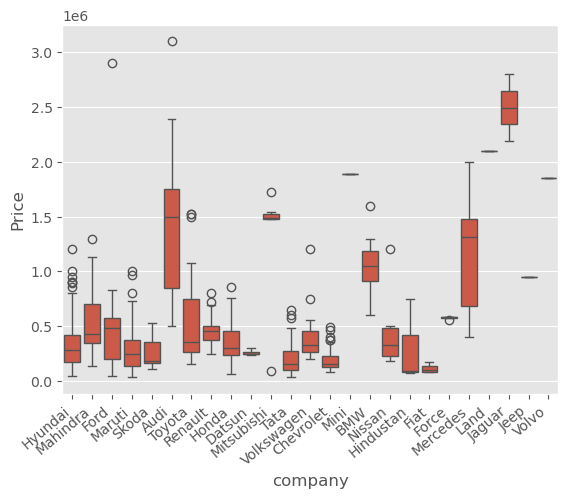

In [118]:
sns.boxplot(x='company', y='Price', data=df)
plt.xticks(rotation=40, ha='right')  
plt.show()

### Checking relationship of Year with Price

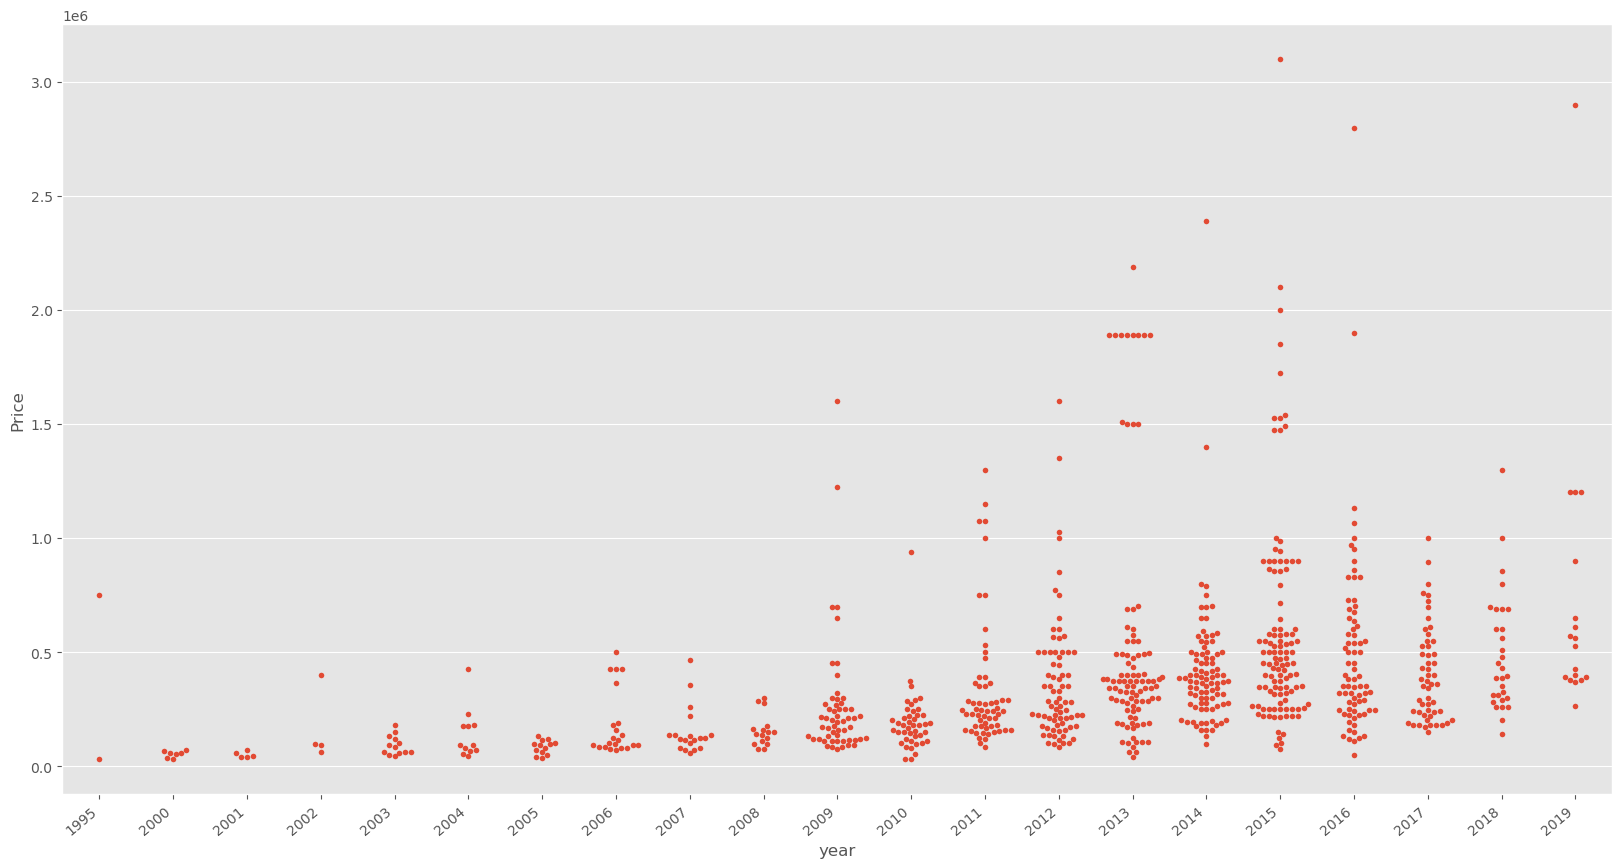

In [126]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='year', y='Price', data=df, size=4) 
plt.xticks(rotation=40, ha='right')
plt.show()

### Checking relationship of kms_driven with Price

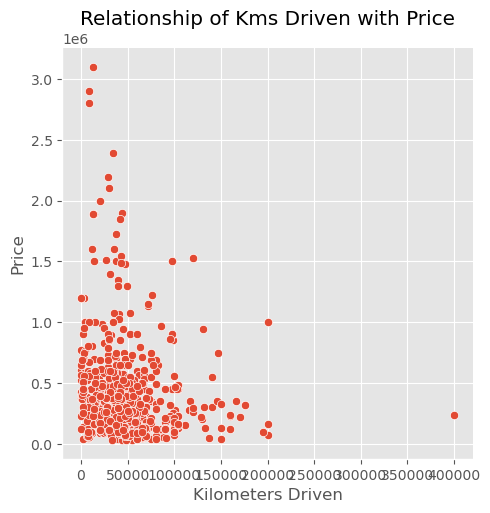

In [128]:
sns.relplot(x='kms_driven', y='Price', data=df)

plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.title("Relationship of Kms Driven with Price")

plt.show()

### Checking relationship of Fuel Type with Price

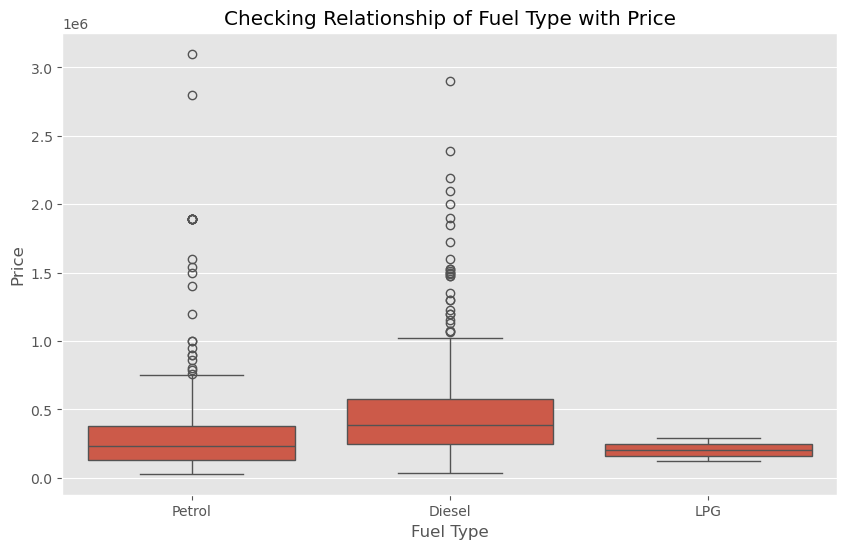

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel_type', y='Price', data=df)

plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Checking Relationship of Fuel Type with Price")
plt.show()

### Relationship of Price with FuelType, Year and Company mixed

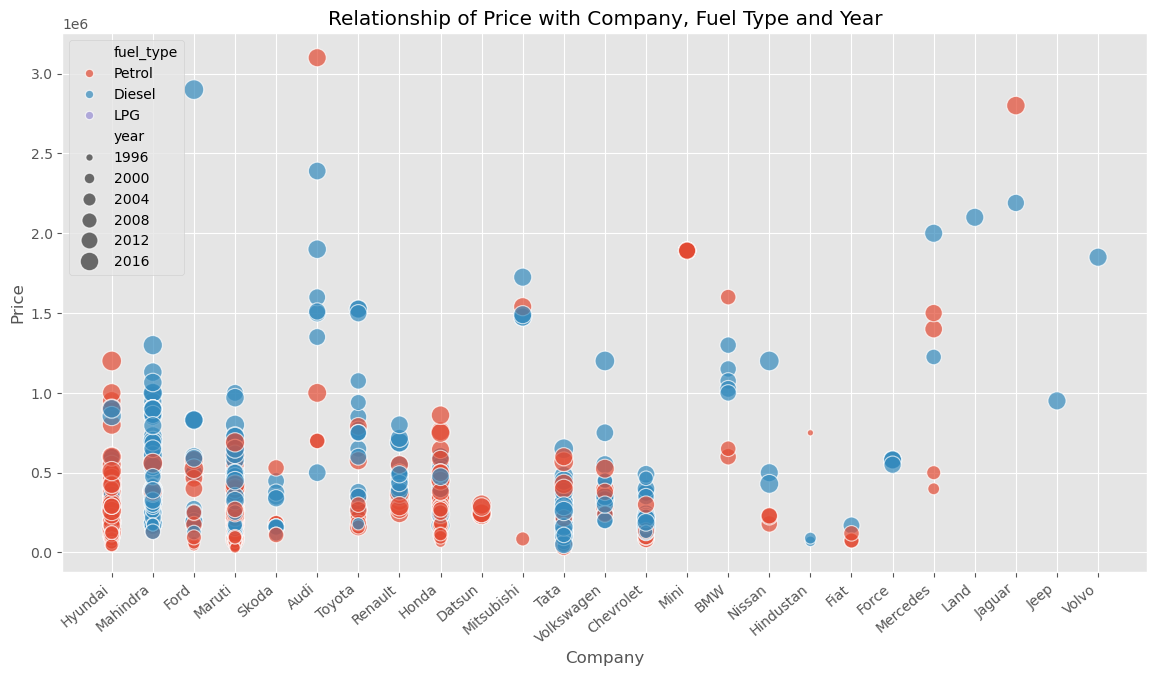

In [134]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='company', y='Price', data=df, hue='fuel_type', size='year', sizes=(20,200), alpha=0.7)

plt.xticks(rotation=40, ha='right')
plt.xlabel("Company")
plt.ylabel("Price")
plt.title("Relationship of Price with Company, Fuel Type and Year")
plt.show()

### Extracting Training Data

In [137]:
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [139]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


In [141]:
y.shape

(816,)

### Applying Train Test Split

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### Creating an OneHotEncoder object to contain all the possible categories

In [151]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [154]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [157]:
lr=LinearRegression()

#### Making a pipeline

In [160]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [163]:
pipe.fit(X_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [165]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [168]:
r2_score(y_test,y_pred)

0.7080742382106922

#### Finding the model with a random state of TrainTestSplit

In [171]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [173]:
np.argmax(scores)

852

In [175]:
scores[np.argmax(scores)]

0.8939946146761343

In [177]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([435222.29568911])

#### The best model

In [179]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8939946146761343

In [195]:
def predict_car_price(name, company, year, kms_driven, fuel_type):
    
    car_df = pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=[[name, company, year, kms_driven, fuel_type]])
    
    predicted_price_inr = pipe.predict(car_df)[0]
    predicted_price_usd = predicted_price_inr / 90 
    return predicted_price_usd
    
price_usd = predict_car_price('Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol')
print(f"Predicted price: ${price_usd:.2f} USD")


Predicted price: $5018.04 USD


In [197]:
def predict_car_price(name, company, year, kms_driven, fuel_type):
   
    car_df = pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=[[name, company, year, kms_driven, fuel_type]])
    
    predicted_price = pipe.predict(car_df)[0]
    return predicted_price
    
price = predict_car_price('Hyundai Santro Xing', 'Hyundai', 2007, 45000, 'Petrol')
print(f"Предвидена цена: {price:.2f} денари")


Предвидена цена: 83774.75 денари
